#  "Understanding Data" Assignment 1

# What is the question being researched?

### Objective/Research Question: Can a Recurrent Neural Network (RNN), specifically an LSTM (Long Short-Term Memory) model, effectively classify tweets as either positive or negative based on their textual content?

In other words, the code aims to determine whether it is possible to build a machine learning model that can automatically analyze the sentiment expressed in tweets and accurately categorize them as either having a positive sentiment or a negative sentiment. This objective involves training a model on a dataset of labeled tweets with known sentiments (positive or negative) and then evaluating the model's performance in terms of accuracy and loss on a test dataset. Additionally, the code highlights the potential challenges posed by imbalanced training data, where the number of negative tweets significantly exceeds the number of positive tweets, and how this imbalance may affect the model's ability to correctly classify positive tweets.

# Why is it interesting?

The code addresses a relevant and widely applicable problem (sentiment analysis), utilizes RNNs and custom problem creation, showcases essential NLP techniques, and discusses practical considerations like imbalanced data. These factors make it an interesting code example for both educational and practical purposes in the field of data science and natural language processing.


### 1. Sentiment Analysis Application:

The code tackles a practical and relevant problem in natural language processing (NLP) - sentiment analysis of tweets. Sentiment analysis has numerous real-world applications, including brand monitoring, customer feedback analysis, and social media sentiment tracking. Understanding the sentiment expressed in text data is valuable for businesses and organizations.

### 2. Use of Recurrent Neural Networks (RNNs):
The code employs RNNs, specifically LSTM (Long Short-Term Memory) networks, which are well-suited for sequential data like text. LSTMs have the ability to capture contextual information and dependencies over sequences, making them a popular choice for NLP tasks.

### 3. Custom Problem Creation:
The code demonstrates the creation of custom datasets and problem statements. This is particularly interesting in an educational context because it allows instructors to design their own unique datasets and problems tailored to specific learning objectives. Custom problems can engage students more effectively and assess their understanding comprehensively.

### 4. Data Preprocessing:
It showcases data preprocessing steps commonly used in NLP, such as text cleaning (lowercasing, special character removal), tokenization, and padding. These preprocessing techniques are fundamental when working with textual data.

###5. Model Evaluation:
The code evaluates the performance of the sentiment analysis model using metrics such as accuracy and loss. This is essential in assessing how well the algorithm is performing and whether it can be considered reliable.

###6. Imbalanced Data Handling:
he code addresses the challenge of imbalanced data, where the number of positive and negative samples in the dataset is significantly different. This is a common issue in real-world datasets, and the code provides insight into handling this challenge.

###7. Practical Implications:
The results of the sentiment analysis model are discussed in terms of correct predictions for positive and negative tweets. This highlights the practical implications of the model, including its strengths (e.g., correctly identifying negative sentiment) and weaknesses (e.g., difficulty in identifying positive sentiment due to imbalanced data).


# What is the theory behind it?

## Let's break down the theory behind the provided code using basic pseudocode explanations:



```
# # Load the dataset containing tweets and their sentiments
data = load_dataset()

# Filter out neutral sentiments, keeping only positive and negative tweets
data = filter_neutral_sentiments(data)

# Preprocess the text data in each tweet
data['text'] = preprocess_text(data['text'])

# Tokenize the text data and convert it into sequences
tokenizer = create_tokenizer()
X = tokenize_and_convert_to_sequences(data['text'], tokenizer)

# Pad the sequences to ensure uniform length
X = pad_sequences(X)

# Define hyperparameters for the LSTM model
embed_dim = 128
lstm_out = 196

# Create an LSTM-based sequential model
model = create_lstm_model(embed_dim, lstm_out)

# Prepare the target variable for training (one-hot encoding)
Y = one_hot_encode_sentiments(data['sentiment'])

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = split_data(X, Y)

# Train the LSTM model on the training data
model.fit(X_train, Y_train, epochs=7, batch_size=batch_size)

# Evaluate the model on the test data to measure performance
score, acc = evaluate_model(X_test, Y_test)

# Prepare a validation set for further evaluation
X_validate, Y_validate = create_validation_set(X_test, Y_test)

# Measure accuracy for positive and negative sentiment separately
positive_accuracy, negative_accuracy = measure_sentiment_accuracy(X_validate, Y_validate)

```

### In this pseudocode, we outline the main steps of the code:

### Data Loading and Preprocessing:
The code begins by loading a dataset containing tweets and their associated sentiments. Neutral sentiments are filtered out, and text preprocessing is applied to clean and prepare the tweet text.


###Tokenization and Padding:
The tweet text is tokenized and converted into sequences, which are then padded to ensure they have the same length.


###Model Creation:
Hyperparameters for the LSTM model are defined, and an LSTM-based sequential model is created.


###Data Preparation:
The target variable (sentiments) is prepared for training by one-hot encoding. The dataset is split into training and testing sets.


###Model Training:
The LSTM model is trained on the training data with a specified number of epochs.


###Model Evaluation:
The model's performance is evaluated on the test data, measuring accuracy and loss.


###Validation Set Creation:
A validation set is prepared from the test data for further evaluation.


###Sentiment Accuracy Measurement:
Accuracy for positive and negative sentiment classifications is separately measured on the validation set.

The pseudocode provides a high-level overview of the code's workflow and key steps, helping to explain the theory behind it.

# Code Example

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

I decided to only do sentiment analysis on this dataset, therfore I dropped the unnecessary colunns, keeping only *sentiment* and *text*.

In [ ]:
data = pd.read_csv('/content/Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

First of all, splitting the dataset into a training and a testing set. The test set is the 10% of the original dataset. For this particular analysis I dropped the neutral tweets, as my goal was to only differentiate positive and negative tweets.

In [ ]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

As a next step I separated the Positive and Negative tweets of the training set in order to easily visualize their contained words.  After that I cleaned the text from hashtags, mentions  and links. Now they were ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

Positive words


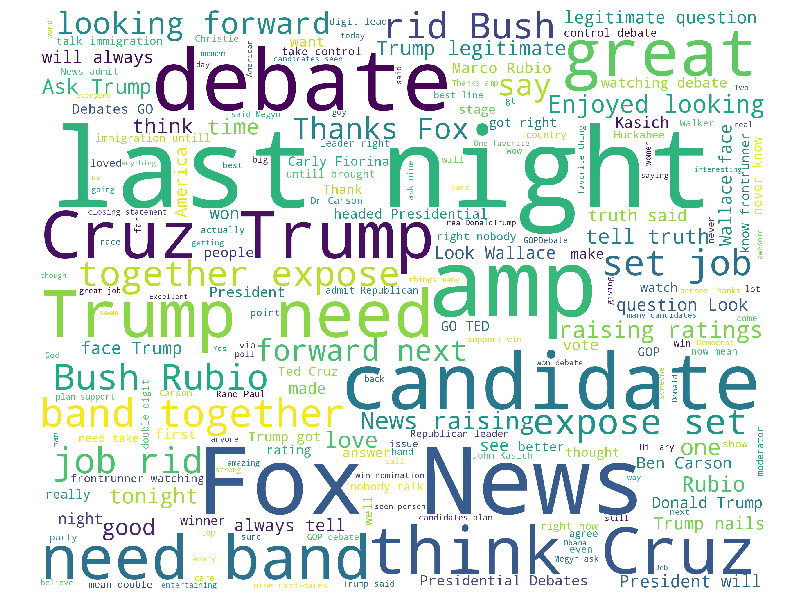

Negative words


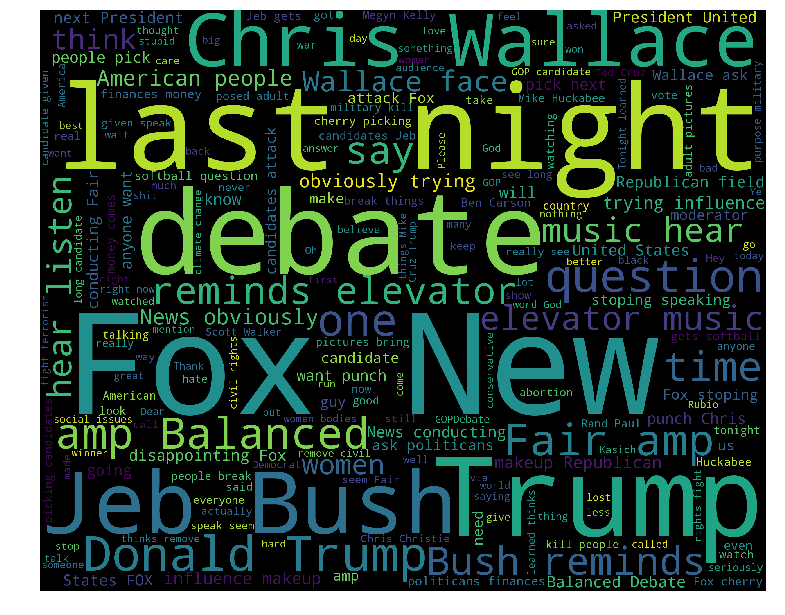

In [ ]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Interesting to notice the following words and expressions in the positive word set:
 **truth**, **strong**, **legitimate**,  **together**, **love**, **job**

In my interpretation, people tend to believe that their ideal candidate is truthful, legitimate, above good and bad.


----------


At the same time, negative tweets contains words like:
**influence**, **news**, **elevator music**, **disappointing**, **softball**, **makeup**, **cherry picking**, **trying**

In my understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

After the vizualization, I removed the hashtags, mentions, links and stopwords from the training set.

**Stop Word:** Stop Words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return vast amount of unnecessary information. ( the, for, this etc. )

In [ ]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

As a next step I extracted the so called features with nltk lib, first by measuring a frequent distribution and by selecting the resulting keys.

In [ ]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

Hereby I plotted the most frequently distributed words. The most words are centered around debate nights.

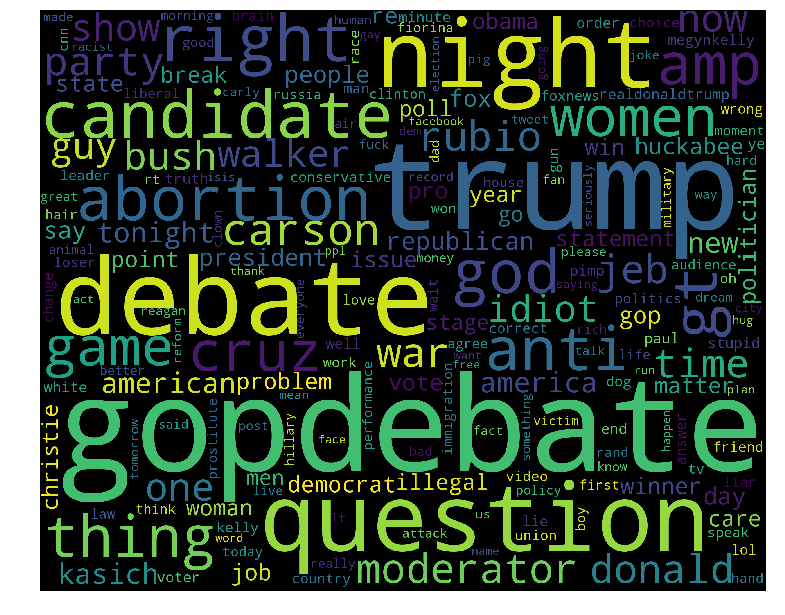

In [ ]:
wordcloud_draw(w_features)

Using the nltk NaiveBayes Classifier I classified the extracted tweet word features.

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

Finally, with not-so-intelligent metrics, I tried to measure how the classifier algorithm scored.

In [ ]:

neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 849/790 
[Positive]: 230/91 


## Epilog ##

In this project I was curious how well nltk and the NaiveBayes Machine Learning algorithm performs for Sentiment Analysis. In my experience, it works rather well for negative comments. The problems arise when the tweets are ironic, sarcastic has reference or own difficult context.

Consider the following tweet:
*"Muhaha, how sad that the Liberals couldn't destroy Trump.  Marching forward."*
As you may already thought, the words **sad** and **destroy** highly influences the evaluation, although this tweet should be positive when observing its meaning and context.

To improve the evalutation accuracy, we need something to take the context and references into consideration. As my project 2.0, I will try to build an LSTM network, and benchmark its results compared to this nltk Machine Learning implementation. Stay tuned.

# Example 2
Sentiment analysis is a natural language processing (NLP) task that involves determining the sentiment or emotional tone of a text. In this example, I'll provide you with Python code for sentiment analysis using Long Short-Term Memory (LSTM) with the Keras library. We'll use the IMDb movie reviews dataset for this task.

### Dataset:

The code utilizes the IMDb movie reviews dataset, a widely used dataset for sentiment analysis. This dataset contains movie reviews labeled as either positive or negative based on their sentiment. It includes a collection of text reviews along with their corresponding sentiment labels.

The dataset is loaded using Keras' imdb.load_data function. It's split into a training set (x_train and y_train) and a test set (x_test and y_test).
The num_words parameter specifies the maximum number of words to keep based on word frequency. In this example, we limit it to 10,000 words, meaning only the 10,000 most frequently occurring words are used for training.
Logic:

### Logic:

### Data Preprocessing:
The movie review texts are tokenized, meaning they are split into individual words and each word is mapped to a unique integer index. This is done using the Tokenizer class from Keras.
The tokenized sequences are then padded to a fixed length using pad_sequences. Padding ensures that all sequences have the same length, which is necessary for training a neural network.

### Model Architecture:
The model architecture consists of an Embedding layer, an LSTM (Long Short-Term Memory) layer, and a Dense layer.
The Embedding layer is responsible for converting integer-encoded words into dense vectors of fixed size (embedding vectors).
The LSTM layer is a type of recurrent neural network (RNN) that can capture sequence information effectively. It processes the embedded sequences.
The Dense layer with a sigmoid activation function is used for binary classification (positive or negative sentiment). It outputs a single value between 0 and 1 representing the predicted sentiment.

### Training the Model:
The dataset is split into training and validation sets using train_test_split. This helps in monitoring the model's performance during training and preventing overfitting.
The model is trained using the training data with binary cross-entropy loss and the Adam optimizer.

### Model Evaluation:
The trained model is evaluated on the test data to measure its performance. Accuracy and loss are commonly used metrics for sentiment analysis tasks.

### Sentiment Prediction:
To make predictions on new text data, you need to preprocess the text in a manner consistent with the training data. The preprocess_text function performs this preprocessing, including tokenization and padding.
The trained model is then used to predict the sentiment of the new text data, where a score closer to 1 indicates positive sentiment and a score closer to 0 indicates negative sentiment.


The following code performs sentiment analysis using LSTM on the IMDb movie reviews dataset. It involves preprocessing the dataset, defining a neural network model, training the model, evaluating its performance, and making predictions on new text data.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split


In [15]:
# Load the IMDb movie reviews dataset
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to a fixed length
max_review_length = 300
x_train = pad_sequences(x_train, maxlen=max_review_length)
x_test = pad_sequences(x_test, maxlen=max_review_length)


17464789/17464789 [==============================] - 0s 0us/step


In [18]:
#Define the LSTM model
embedding_size = 128

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_size, input_length=max_review_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 128)          1280000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
# Split the training data into a training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train the model
batch_size = 128
epochs = 5

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)


Epoch 1/5
157/157 [==============================] - 128s 795ms/step - loss: 0.5536 - accuracy: 0.7155 - val_loss: 0.4609 - val_accuracy: 0.7882
Epoch 2/5
157/157 [==============================] - 120s 764ms/step - loss: 0.2820 - accuracy: 0.8888 - val_loss: 0.3045 - val_accuracy: 0.8776
Epoch 3/5
157/157 [==============================] - 119s 760ms/step - loss: 0.1960 - accuracy: 0.9269 - val_loss: 0.3773 - val_accuracy: 0.8434
Epoch 4/5
157/157 [==============================] - 121s 771ms/step - loss: 0.1458 - accuracy: 0.9485 - val_loss: 0.3368 - val_accuracy: 0.8738
Epoch 5/5
157/157 [==============================] - 131s 834ms/step - loss: 0.1294 - accuracy: 0.9524 - val_loss: 0.3765 - val_accuracy: 0.8564


782/782 - 75s - loss: 0.6931 - accuracy: 0.5020 - 75s/epoch - 96ms/step
Test accuracy: 0.5019599795341492


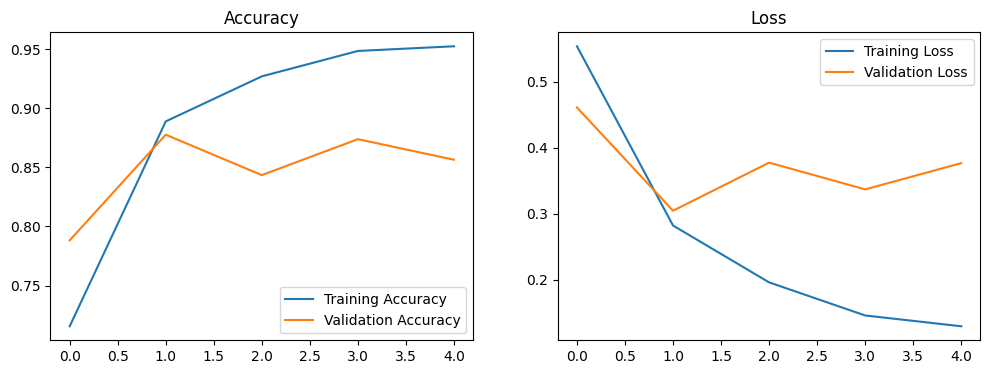

In [19]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


###Make predictions
You can now use the trained model to make sentiment predictions on new text data.

This code provides a basic sentiment analysis using LSTM on the IMDb movie reviews dataset. Depending on your specific needs, you can further optimize and fine-tune the model, or explore more advanced NLP techniques and datasets for sentiment analysis.

References:

[A Gentle Introduction to Long Short-Term Memory Networks by the Experts](https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/)

[Long Short-Term Memory Architecture](https://developer.nvidia.com/discover/lstm)


